In [1]:
#!pip install tweepy

In [2]:
import pandas as pd
import numpy as np
import tweepy

In [3]:
consumer_key = '7lwWwRVcrj6X4yopfbLmq5wYN'
consumer_secret = 'Wlrqp89iUKp0YZUdEtjHHVLU2sDPEHplWqwz0OefSp4TRDzm8L'
access_token = '1095060652077531137-2xPZpsbdKxmo3XyB2r7JTWhMKy34JQ'
access_token_secret = 'IUlod3xsqmgOLcKbU8pQRh7DDb6EzAVmFHXu8OC8B4FsM'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

q = 'Real Madrid'
searched_tweets = [status for status in tweepy.Cursor(api.search, q=q).items(1000)]

In [4]:
busca = []
for tweet in searched_tweets:
    busca.append(tweet.text)

In [5]:
data = pd.DataFrame(busca, columns = ['text'])

In [6]:
data.head(5)

,text
0,RT @BarclaysLeague: .@LFC will offer Netherlan...
1,"RT @juanma_rguez: Por cierto, ¿he dicho ya que..."
2,RT @DonJoseMourinh0: Los números de José en su...
3,"PSG : Ronaldo, arme secrète du Real Madrid pou..."
4,RT @BolaSportcom: Juventus Siap 'Culik' Sergio...


In [7]:
# verificar numero de palavras em uppercase (caixa alta)
data['text'].apply(lambda x: len([x for x in x.split() if x.isupper()])).sum()

1294

In [8]:
# transformando em lowcase
data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head(5)

,text
0,rt @barclaysleague: .@lfc will offer netherlan...
1,"rt @juanma_rguez: por cierto, ¿he dicho ya que..."
2,rt @donjosemourinh0: los números de josé en su...
3,"psg : ronaldo, arme secrète du real madrid pou..."
4,rt @bolasportcom: juventus siap 'culik' sergio...


In [9]:
data['text'] = data['text'].str.replace('[^\w\s]','')
data['text'] = data['text'].str.replace('rt','')
data['text'] = data['text'].str.replace(q.lower(),'')
data.head(5)

,text
0,barclaysleague lfc will offer netherlands cen...
1,juanma_rguez por cieo he dicho ya que el vie...
2,donjosemourinh0 los números de josé en su ant...
3,psg ronaldo arme secrète du pour soffrir ney...
4,bolaspocom juventus siap culik sergio ramos d...


In [10]:
#!pip install stop-words

In [11]:
from stop_words import get_stop_words
stop = get_stop_words('spanish')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
stop = get_stop_words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head(5)

,text
0,barclaysleague lfc will offer netherlands cent...
1,juanma_rguez cieo dicho viene ganar 3 copas eu...
2,donjosemourinh0 números josé anterior etapa 3 ...
3,psg ronaldo arme secrète du pour soffrir neyma...
4,bolaspocom juventus siap culik sergio ramos da...


In [12]:
# data['text']

In [13]:
import nltk
from collections import Counter

In [14]:
data['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).sort_values(ascending=False).head(20)

v             97.0
goles         78.0
real          77.0
liga          74.0
mourinho      74.0
neymar        71.0
year          60.0
chelsea       58.0
juventus      58.0
liverpool     57.0
valladolid    54.0
will          53.0
vs            52.0
ronaldo       52.0
ht            51.0
madrid        50.0
43            50.0
ucl           49.0
psg           46.0
solari        46.0
dtype: float64

In [15]:
#!pip install pillow
#!pip install wordcloud

In [16]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

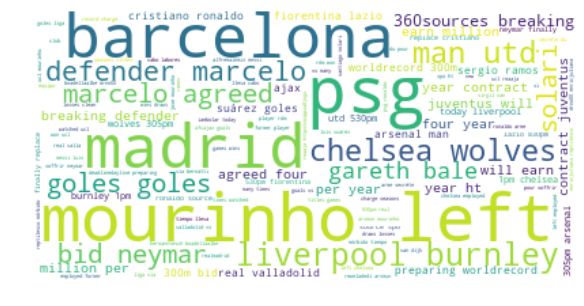

In [17]:
text = " ".join(item for item in data.text)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[15,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()